#  Plane stress quad model visualization

This model code  from [Plot stress distribution of a plane stress quad model](https://opsvis.readthedocs.io/en/latest/ex_quads_4x4.html)

In [1]:
import opstool
import openseespy.opensees as ops
import opstool.vis.pyvista as opsvis

## Model

In [2]:
ops.wipe()
ops.model("basic", "-ndm", 2, "-ndf", 2)
ops.node(1, 0.0, 0.0)
ops.node(2, 0.0, 1.0)
ops.node(3, 0.0, 2.0)
ops.node(4, 0.0, 3.0)
ops.node(5, 0.0, 4.0)
ops.node(6, 1.0, 0.0)
ops.node(7, 1.0, 1.0)
ops.node(8, 1.0, 2.0)
ops.node(9, 1.0, 3.0)
ops.node(10, 1.0, 4.0)
ops.node(11, 2.0, 0.0)
ops.node(12, 2.0, 1.0)
ops.node(13, 2.0, 2.0)
ops.node(14, 2.0, 3.0)
ops.node(15, 2.0, 4.0)
ops.node(16, 3.0, 0.0)
ops.node(17, 3.0, 1.0)
ops.node(18, 3.0, 2.0)
ops.node(19, 3.0, 3.0)
ops.node(20, 3.0, 4.0)
ops.node(21, 4.0, 0.0)
ops.node(22, 4.0, 1.0)
ops.node(23, 4.0, 2.0)
ops.node(24, 4.0, 3.0)
ops.node(25, 4.0, 4.0)

ops.nDMaterial("ElasticIsotropic", 1, 1000, 0.3)

ops.element("quad", 1, 1, 6, 7, 2, 1, "PlaneStress", 1)
ops.element("quad", 2, 2, 7, 8, 3, 1, "PlaneStress", 1)
ops.element("quad", 3, 3, 8, 9, 4, 1, "PlaneStress", 1)
ops.element("quad", 4, 4, 9, 10, 5, 1, "PlaneStress", 1)
ops.element("quad", 5, 6, 11, 12, 7, 1, "PlaneStress", 1)
ops.element("quad", 6, 7, 12, 13, 8, 1, "PlaneStress", 1)
ops.element("quad", 7, 8, 13, 14, 9, 1, "PlaneStress", 1)
ops.element("quad", 8, 9, 14, 15, 10, 1, "PlaneStress", 1)
ops.element("quad", 9, 11, 16, 17, 12, 1, "PlaneStress", 1)
ops.element("quad", 10, 12, 17, 18, 13, 1, "PlaneStress", 1)
ops.element("quad", 11, 13, 18, 19, 14, 1, "PlaneStress", 1)
ops.element("quad", 12, 14, 19, 20, 15, 1, "PlaneStress", 1)
ops.element("quad", 13, 16, 21, 22, 17, 1, "PlaneStress", 1)
ops.element("quad", 14, 17, 22, 23, 18, 1, "PlaneStress", 1)
ops.element("quad", 15, 18, 23, 24, 19, 1, "PlaneStress", 1)
ops.element("quad", 16, 19, 24, 25, 20, 1, "PlaneStress", 1)

ops.fix(1, 1, 1)
ops.fix(6, 1, 1)
ops.fix(11, 1, 1)
ops.fix(16, 1, 1)
ops.fix(21, 1, 1)

ops.equalDOF(2, 22, 1, 2)
ops.equalDOF(3, 23, 1, 2)
ops.equalDOF(4, 24, 1, 2)
ops.equalDOF(5, 25, 1, 2)

In [3]:
ops.timeSeries("Linear", 1)
ops.pattern("Plain", 1, 1)
ops.load(15, 0.0, -1.0)

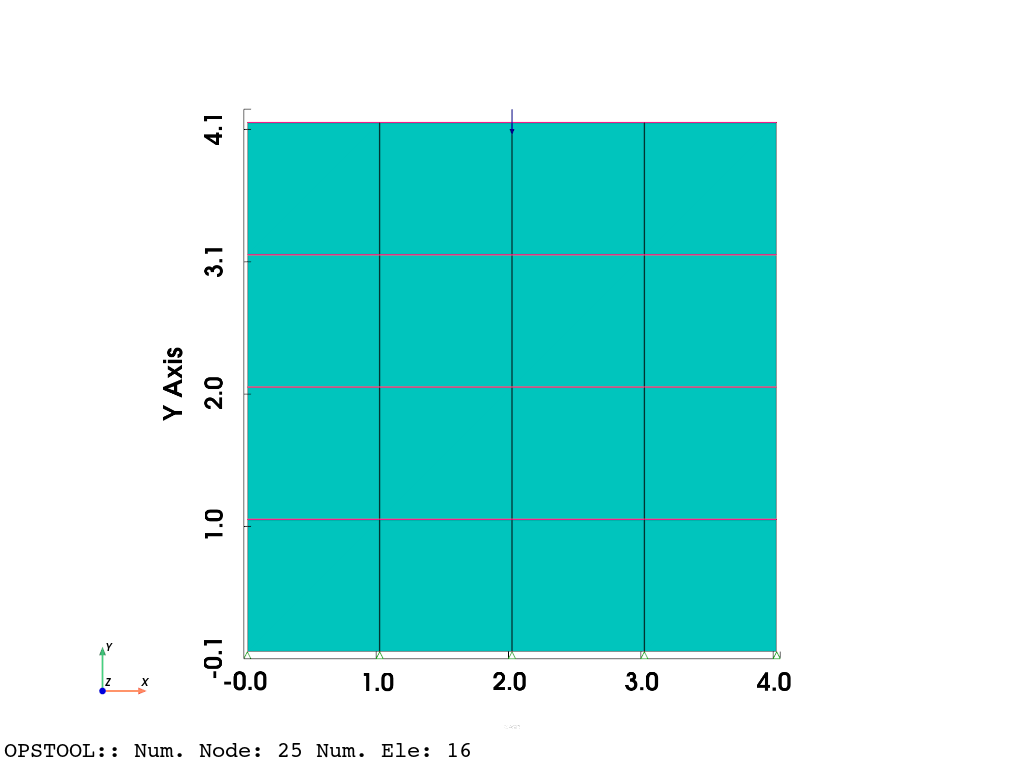

In [4]:
on_notebook = True
jupyter_backend = "static"
# on_notebook = False
# jupyter_backend = None

opsvis.set_plot_props(point_size=0, notebook=on_notebook)
fig = opsvis.plot_model(show_nodal_loads=True, show_ele_loads=True, show_outline=True)
fig.show(jupyter_backend=jupyter_backend)
# fig.show()

## Results visualization

In [5]:
ops.constraints("Transformation")
ops.numberer("RCM")
ops.system("BandGeneral")
ops.test("NormDispIncr", 1.0e-8, 6, 2)
ops.algorithm("Linear")
ops.integrator("LoadControl", 0.1)
ops.analysis("Static")

In [6]:
ODB = opstool.post.CreateODB(
    odb_tag=1,
    compute_mechanical_measures=True,  # compute stress measures, strain measures, etc.
    project_gauss_to_nodes="copy",  # project gauss point responses to nodes, optional ["copy", "average", "extrapolate"]
)
for _ in range(10):
    ops.analyze(1)
    ODB.fetch_response_step()
ODB.save_response()

OPSTOOL ::  All responses data with _odb_tag = 1 saved in .opstool.output/RespStepData-1.nc!

OPSTOOL ::  Loading response data from .opstool.output/RespStepData-1.nc ...

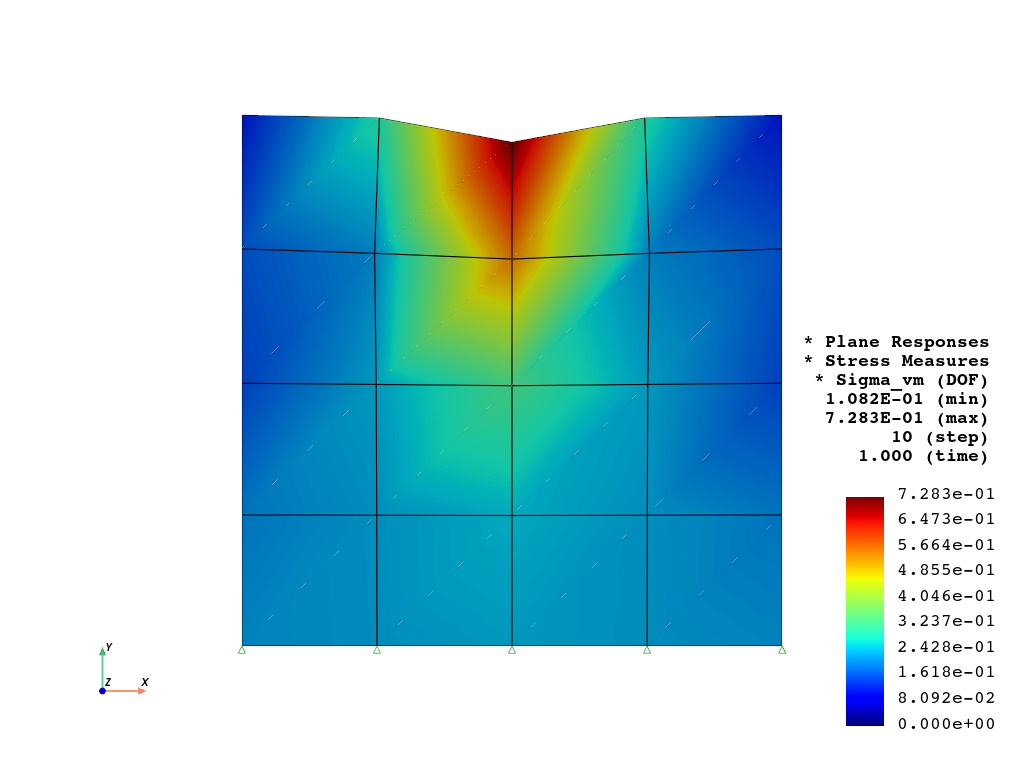

In [7]:
fig = opsvis.plot_unstruct_responses(
    odb_tag=1,
    slides=False,
    step="absMax",
    ele_type="Plane",
    resp_type="StressesAtNodes",  # or "stressesAtGauss", "strainsAtNodes", project_gauss_to_nodes needs to be set prior
    resp_dof="sigma_vm",
    show_defo=True,
    defo_scale="auto",
    show_model=True,
)
fig.show(jupyter_backend=jupyter_backend)

OPSTOOL ::  Loading response data from .opstool.output/RespStepData-1.nc ...

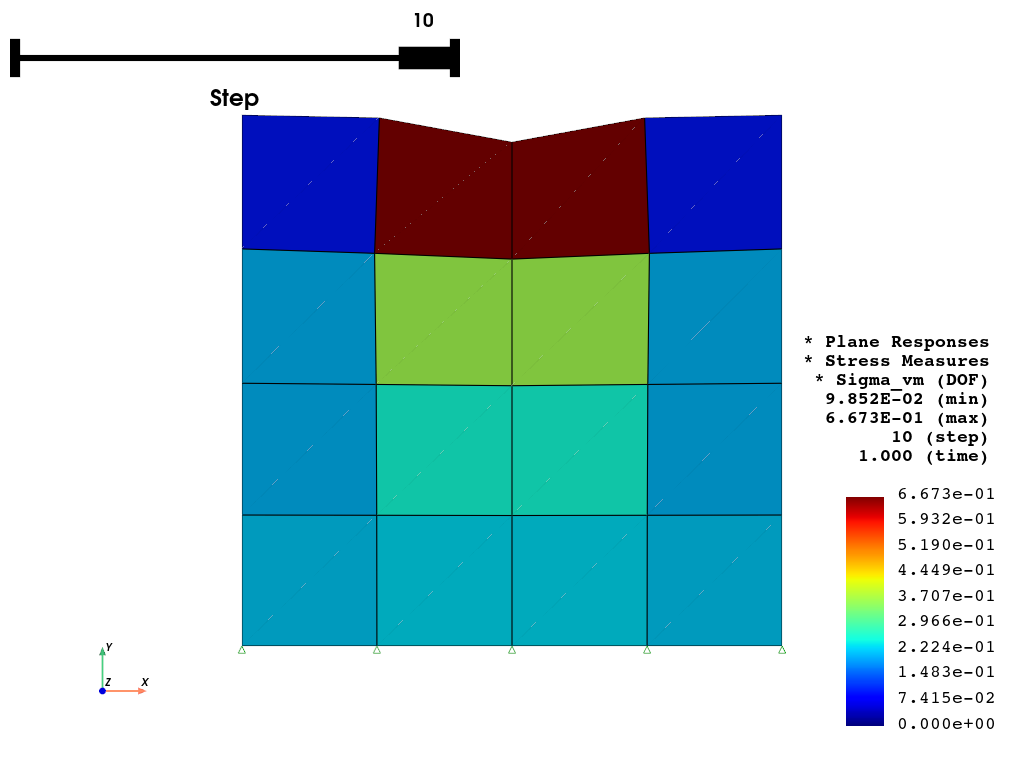

In [8]:
fig = opsvis.plot_unstruct_responses(
    odb_tag=1,
    slides=True,
    ele_type="Plane",
    resp_type="stresses",  # at Gauss points, it will be averaged over the element
    resp_dof="sigma_vm",
    show_model=False,
    show_defo=True,
    defo_scale="auto",
)
fig.show(jupyter_backend=jupyter_backend)
# fig.show()

## Interacting with Pyvista

Since version 1.0.18, opstool provides a function ``get_unstruct_responses_dataset`` that returns a pyvista [UnstructuredGrid](https://docs.pyvista.org/api/core/_autosummary/pyvista.unstructuredgrid#pyvista.UnstructuredGrid) so that you can take advantage of all the functionality on it.

In [9]:
import pyvista as pv

In [10]:
ugrid = opsvis.get_unstruct_responses_dataset(
    odb_tag=1, step="absMax", ele_type="Plane", resp_type="stressesAtNodes", resp_dof="sigma_vm", defo_scale=0.0
)
print(ugrid)
print(ugrid.active_scalars_name)

OPSTOOL ::  Loading response data from .opstool.output/RespStepData-1.nc ...

UnstructuredGrid (0x1d14ccb02e0)
  N Cells:    16
  N Points:   25
  X Bounds:   0.000e+00, 4.000e+00
  Y Bounds:   0.000e+00, 4.000e+00
  Z Bounds:   0.000e+00, 0.000e+00
  N Arrays:   1
StressMeasuresAtNodes


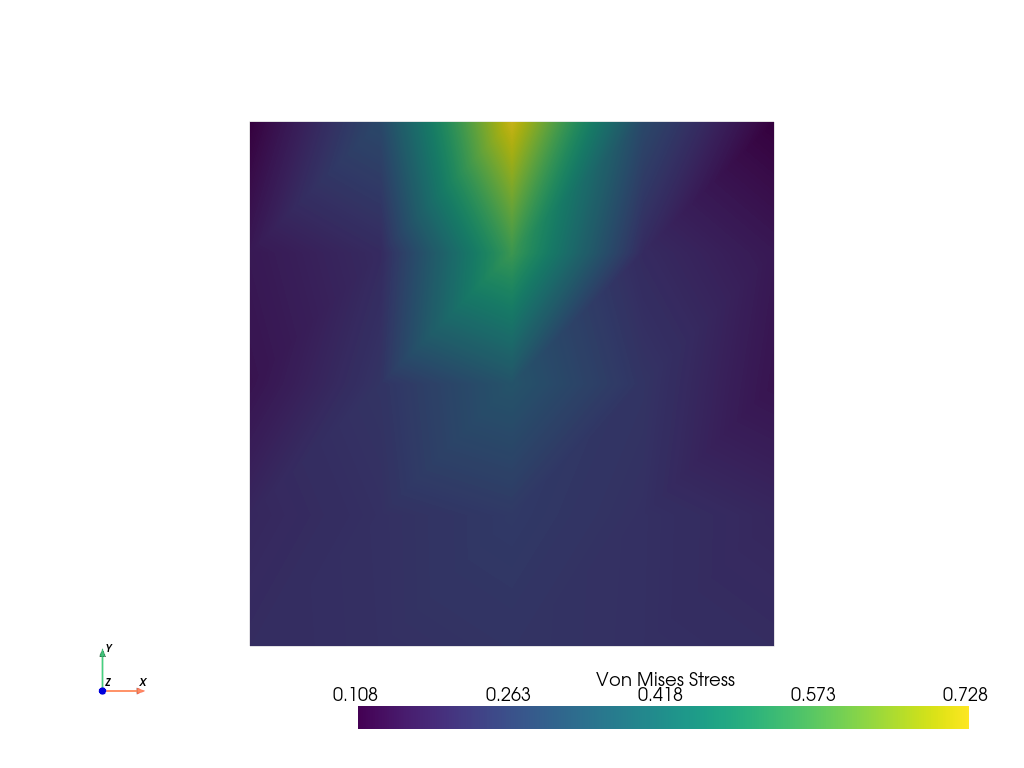

In [11]:
ugrid.plot(
    jupyter_backend=jupyter_backend,
    cpos="xy",
    show_edges=False,
    show_scalar_bar=True,
    scalar_bar_args={"title": "Von Mises Stress"},
)

### Plot on line

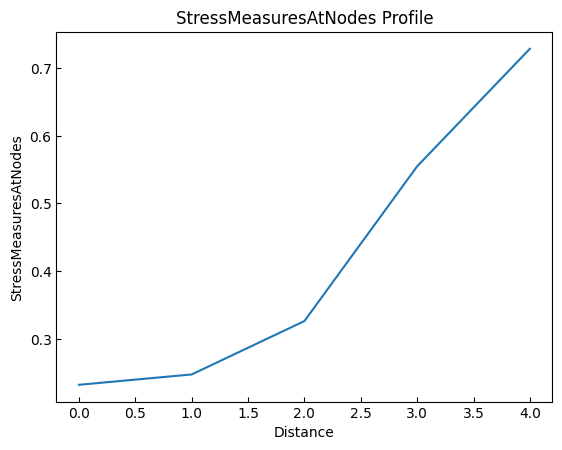

In [12]:
pa = (2, 0, 0)
pb = (2, 4, 0)
ugrid.plot_over_line(pa, pb)

### Thresholding

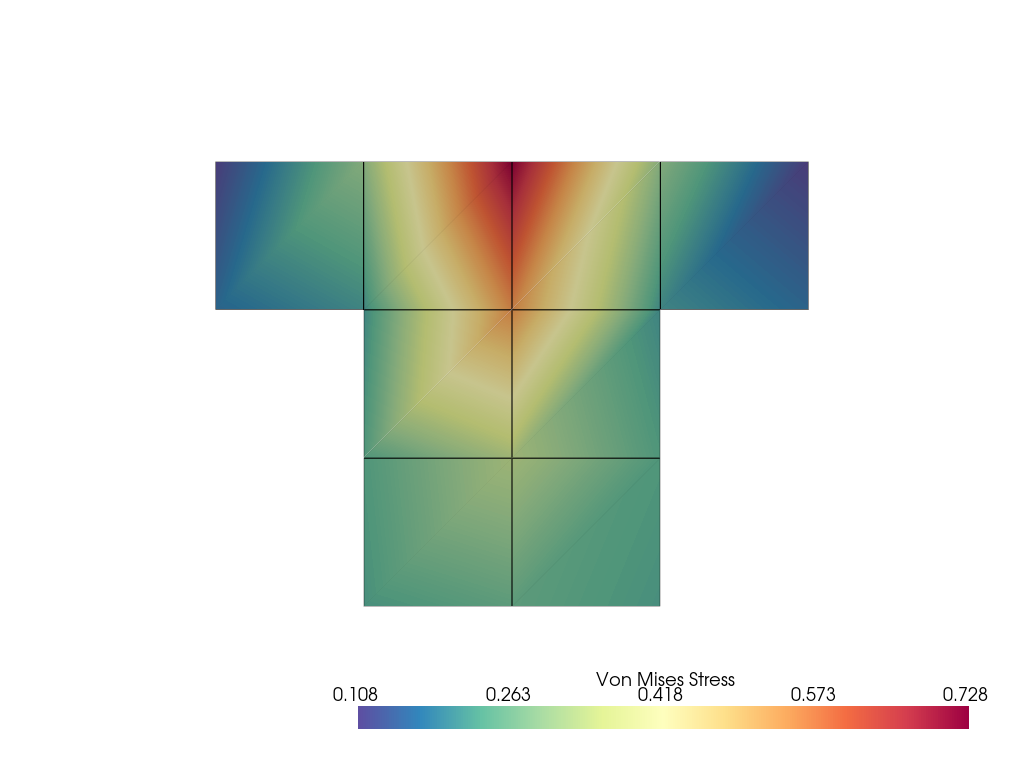

In [13]:
threshed = ugrid.threshold([0.263, 0.573])

p = pv.Plotter()
p.add_mesh(
    threshed, cmap="Spectral_r", show_edges=True, show_scalar_bar=True, scalar_bar_args={"title": "Von Mises Stress"}
)
p.show(jupyter_backend=jupyter_backend, cpos="xy")

More details can be found in the [PyVista Examples](https://docs.pyvista.org/examples/).